## CSGO : Player and Team stats

This dataset comprises stats for every professional csgo player until 2021. It includes name, country, teams, total maps played, total rounds played, kd_diff, kd and rating for every player (kd = kill/death; diff = differential).

The dataset contains 1869 entries and 9 columns. Here is a summary of the attributes:

name: Player names; Data type: String; Unique values: 1858 
country: Countries of players; Data type: String; Unique values: 72 
teams: Teams or organizations players have participated in; Data type: String; Unique values: 1640.
total_maps: Total maps played by the players; Data type: Integer.
total_rounds: Total rounds played by the players; Data type: Integer
kd_diff: Kill-Death difference (positive or negative); Data type: Integer.
kd: Kill-Death ratio; Data type: Float.
rating: Player performance rating; Data type: Float.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

In [2]:
file_path = "player_stats.csv"
df = pd.read_csv(file_path, index_col=0)
df

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
...,...,...,...,...,...,...,...,...
1864,SPAMMER,United States,"['Variance', 'Rap Gang', 'Levitate', 'Under 21']",135,3458,-756,0.70,0.74
1865,valens,United States,"['Complexity', 'Complexity', 'Nihilum', 'ImPer...",251,6594,-1459,0.69,0.74
1866,breaker,Australia,"['munyanyo', 'seadoggs', 'Rooster']",132,3160,-749,0.69,0.73
1867,frgd,Indonesia,['nxl'],130,3196,-822,0.65,0.70


## Brief description of the data set and a summary of its attributes

In [3]:
df.describe()

,total_maps,total_rounds,kd_diff,kd,rating
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,435.231675,11399.083467,180.254147,0.996726,0.985757
std,391.291072,10298.045537,991.956591,0.100515,0.075545
min,100.000000,2348.000000,-6238.000000,0.630000,0.680000
25%,152.000000,3977.000000,-269.000000,0.930000,0.940000
50%,271.000000,7076.000000,-32.000000,0.990000,0.990000
75%,592.000000,15532.000000,352.000000,1.060000,1.030000
max,2064.000000,54137.000000,8070.000000,1.430000,1.280000


In [4]:
features = df.columns
features

Index(['name', 'country', 'teams', 'total_maps', 'total_rounds', 'kd_diff',
       'kd', 'rating'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of            name        country  \
0         ZywOo         France   
1        s1mple        Ukraine   
2          deko         Russia   
3        saffee         Brazil   
4         sh1ro         Russia   
...         ...            ...   
1864    SPAMMER  United States   
1865     valens  United States   
1866    breaker      Australia   
1867       frgd      Indonesia   
1868  OverDrive         Russia   

                                                  teams  total_maps  \
0                                   ['Vitality', 'aAa']         854   
1                         ['Natus Vincere', 'FlipSid3']        1429   
2                                              ['1WIN']         190   
3                                              ['paiN']         202   
4                       ['Gambit', 'Gambit Youngsters']         744   
...                                                 ...         ...   
1864   ['Variance', 'Rap Gang', 'Levitate', 'Under 21']       

array([[<Axes: title={'center': 'total_maps'}>,
        <Axes: title={'center': 'total_rounds'}>],
       [<Axes: title={'center': 'kd_diff'}>,
        <Axes: title={'center': 'kd'}>],
       [<Axes: title={'center': 'rating'}>, <Axes: >]], dtype=object)

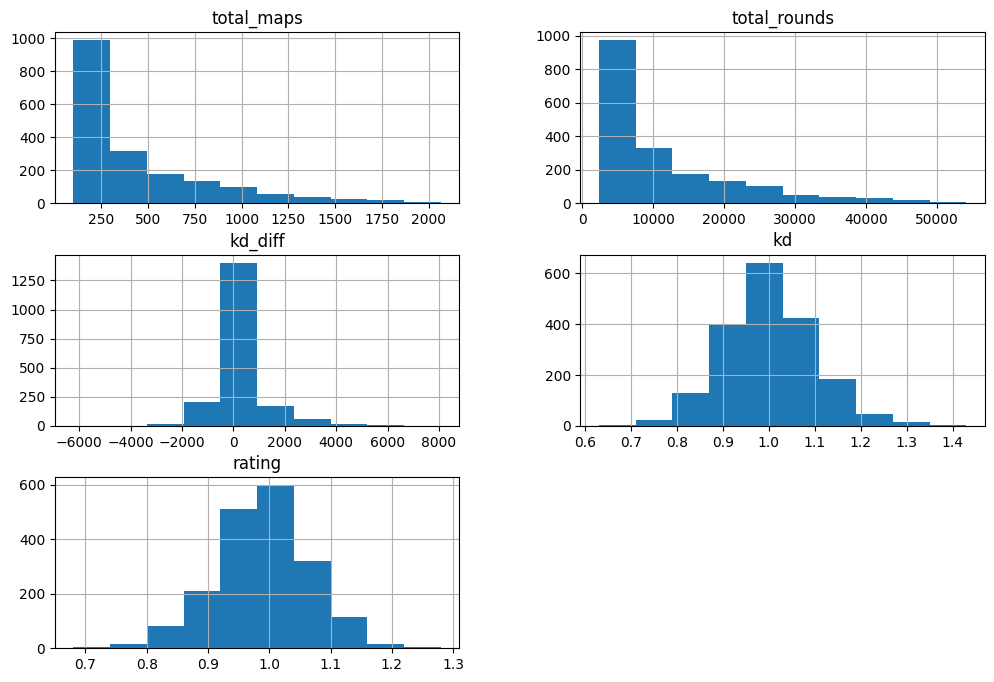

In [6]:
df.hist(figsize=(12, 8))

## Data cleaning
Verified no missing values across all columns

In [7]:
df.isnull().sum()

name            0
country         0
teams           0
total_maps      0
total_rounds    0
kd_diff         0
kd              0
rating          0
dtype: int64

Deleting duplicated data

In [8]:
df = df.drop_duplicates(subset=['name'], keep='last')

## Data exploration
Analyse the kd and rating of the players

In [9]:
performance_features = ["kd", "rating"]

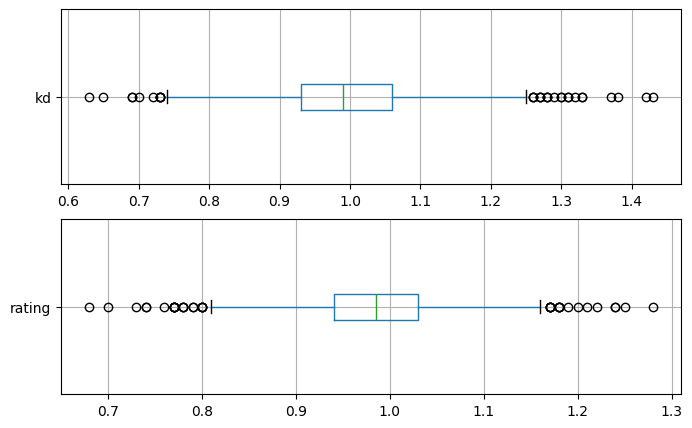

In [10]:
fig, axes = plt.subplots(2,1 ,figsize=(8,5))

for i,c in enumerate(performance_features):
    f = df[[c]].boxplot(ax=axes[i], vert=False)

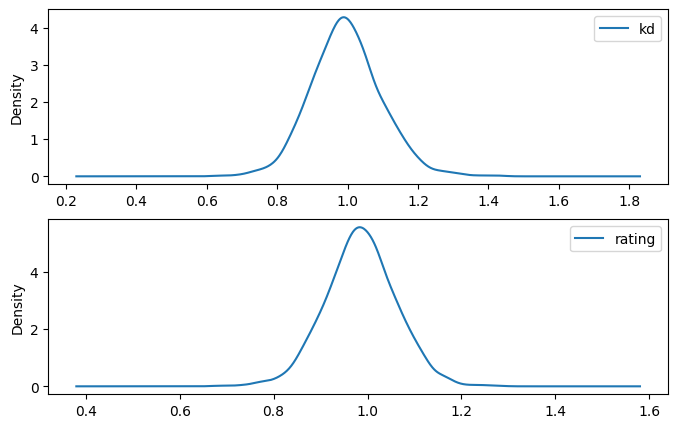

In [11]:
fig, axes = plt.subplots(2,1 ,figsize=(8,5))

for i,c in enumerate(performance_features):
    f = df[[c]].plot(kind = 'kde', ax=axes[i])

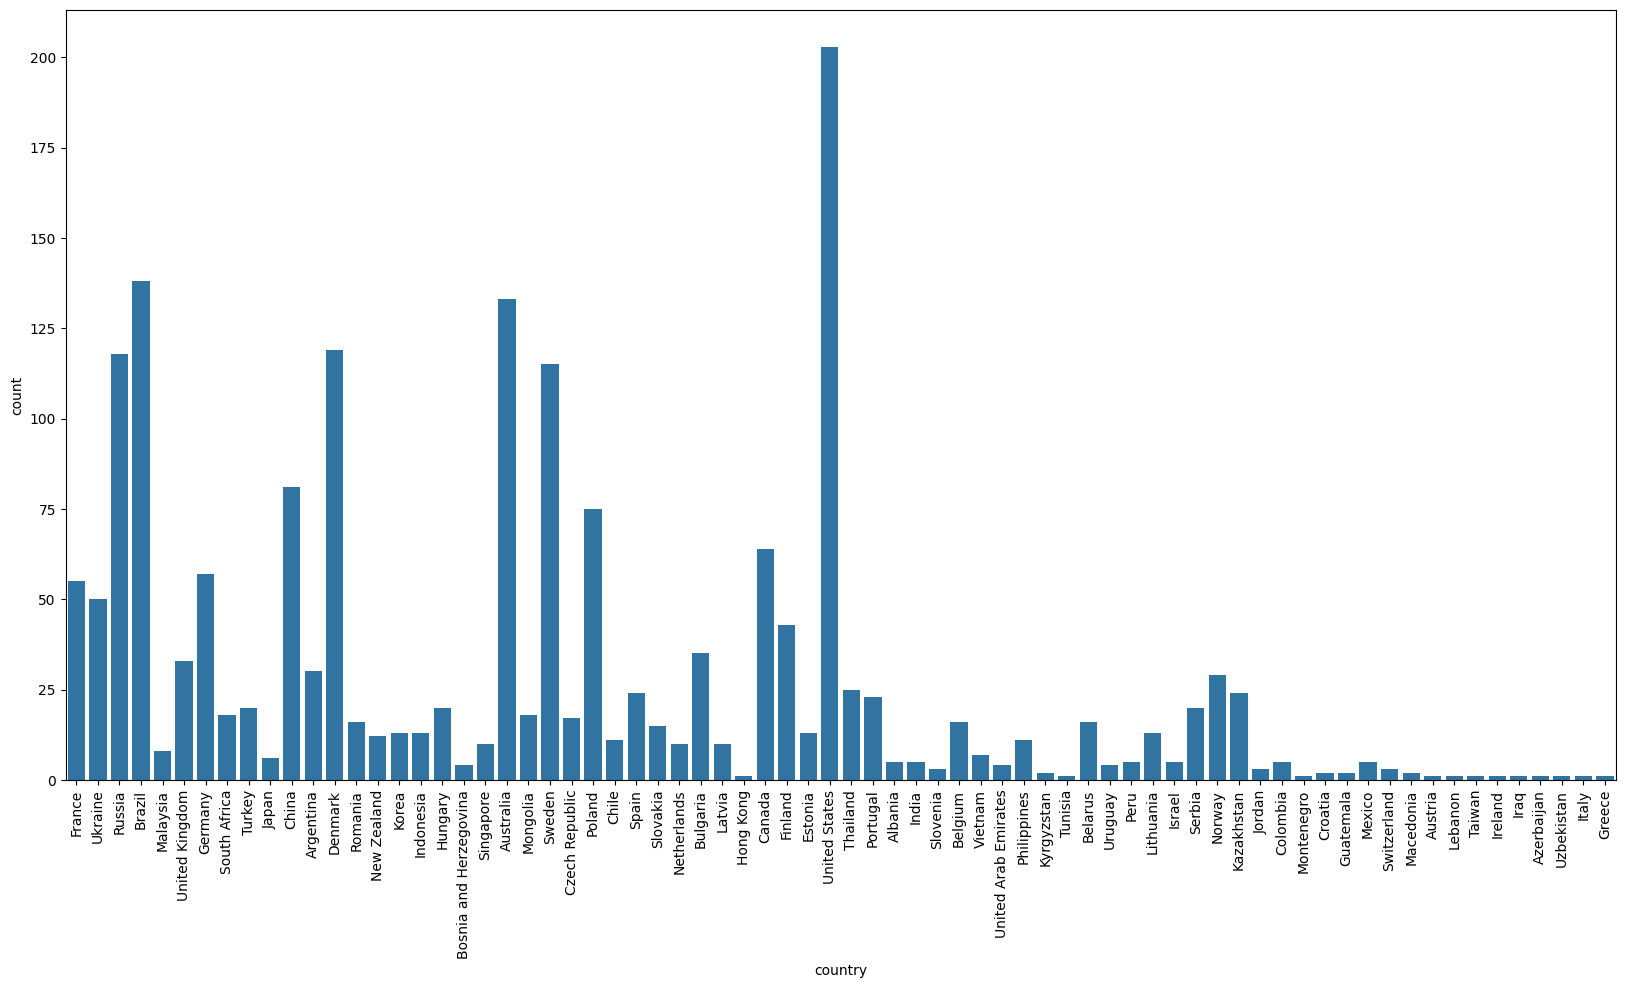

In [12]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
countplot = sns.countplot(x="country", data=df)
plt.show()

## Feature Engineering
Introducing a region column categorizing players into "Europe," "Americas," "Asia-Pacific," and "Other."
Creating binary flags (is_european, is_american, etc.) to facilitate regional analysis.

In [13]:
european_countries = [
    "France", "Ukraine", "Russia", "Germany", "Sweden", "Denmark", "Poland",
    "Finland", "Norway", "United Kingdom", "Netherlands", "Belgium",
    "Spain", "Italy", "Portugal", "Czech Republic", "Hungary", "Slovakia",
    "Austria", "Switzerland", "Romania", "Bulgaria", "Greece", "Serbia",
    "Croatia", "Estonia", "Latvia", "Lithuania", "Iceland", "Ireland",
    "Slovenia", "Luxembourg"
]

american_countries = [
    "United States", "Canada", "Brazil", "Argentina", "Mexico", "Chile", "Colombia",
    "Peru", "Uruguay", "Venezuela", "Ecuador", "Paraguay", "Bolivia", "Cuba"
]

asia_pacific_countries = [
    "China", "Japan", "South Korea", "India", "Australia", "New Zealand", "Indonesia",
    "Malaysia", "Philippines", "Thailand", "Vietnam", "Singapore", "Pakistan",
    "Bangladesh", "Sri Lanka"
]

european_players = df[df['country'].isin(european_countries)]
american_players = df[df['country'].isin(american_countries)]
asia_pacific_players = df[df['country'].isin(asia_pacific_countries)]

def assign_region(country):
    if country in european_countries:
        return 'Europe'
    elif country in american_countries:
        return 'Americas'
    elif country in asia_pacific_countries:
        return 'Asia-Pacific'
    else:
        return 'Other'

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_7028\3346780781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = df['country'].apply(assign_region)


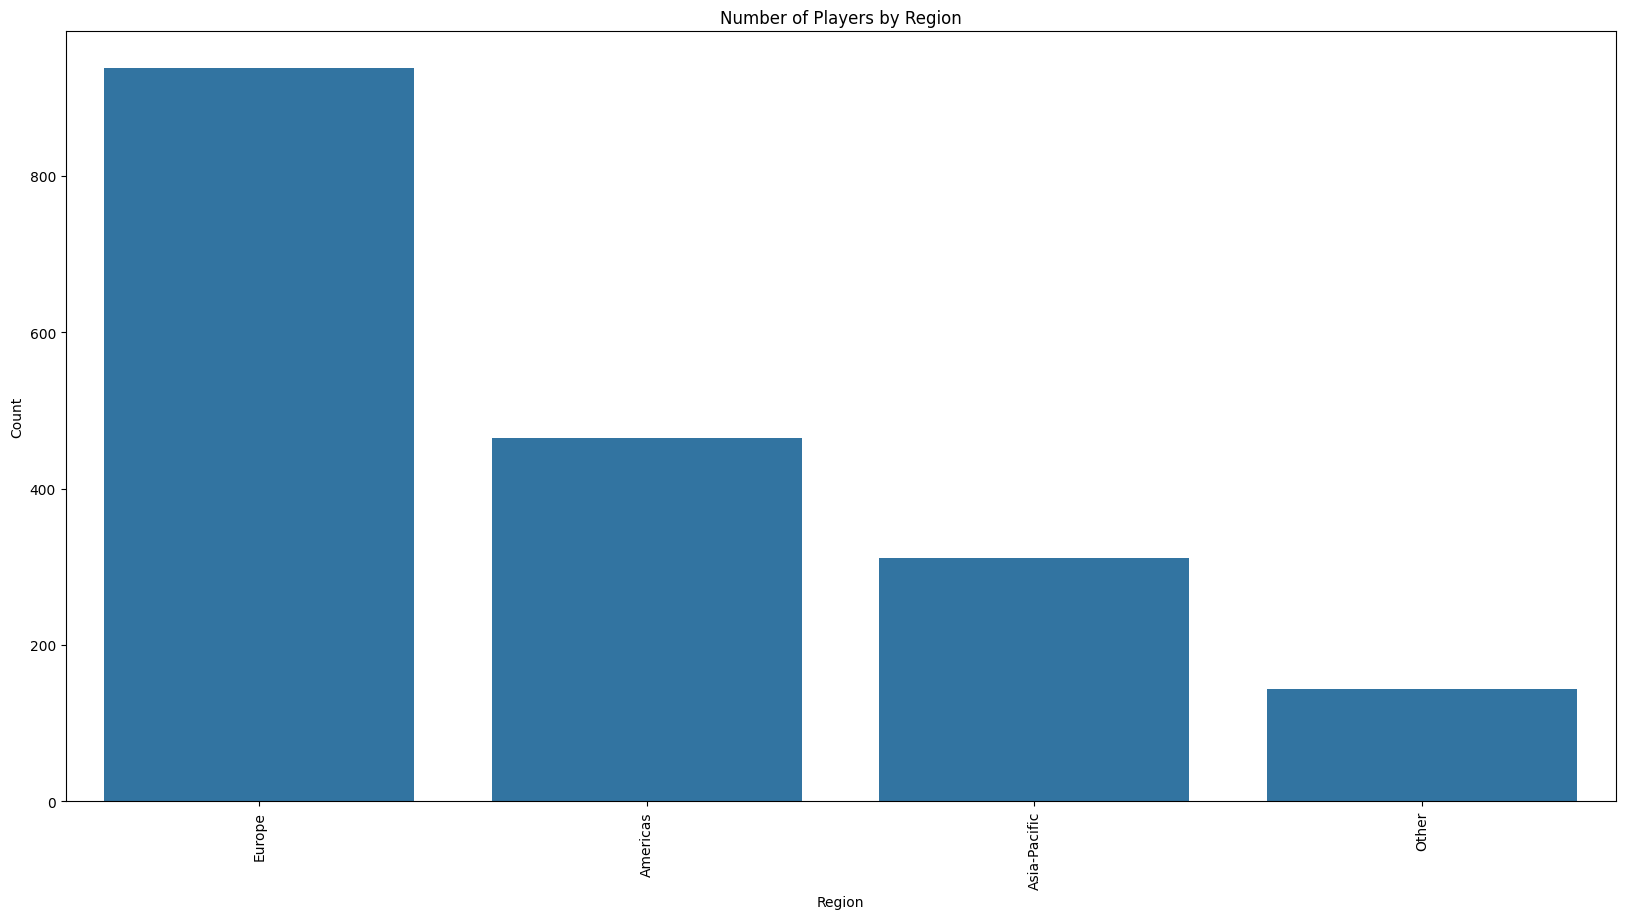

In [14]:
df['region'] = df['country'].apply(assign_region)

plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
countplot = sns.countplot(x="region", data=df, order=['Europe', 'Americas', 'Asia-Pacific', 'Other'])
plt.title("Number of Players by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

Correlation between each region and the player's kd

In [15]:
df['is_european'] = (df['region'] == 'Europe').astype(int)
df['is_american'] = (df['region'] == 'Americas').astype(int)
df['is_asia_pacific'] = (df['region'] == 'Asia-Pacific').astype(int)
df['is_other'] = (df['region'] == 'Other').astype(int)

correlation_results = {
    'is_european': df[['kd', 'is_european']].corr().iloc[0, 1],
    'is_american': df[['kd', 'is_american']].corr().iloc[0, 1],
    'is_asia_pacific': df[['kd', 'is_asia_pacific']].corr().iloc[0, 1],
    'is_other': df[['kd', 'is_other']].corr().iloc[0, 1],
}

for region_flag, corr_value in correlation_results.items():
    print(f"Correlation between 'kd' and {region_flag}: {corr_value:.3f}")

Correlation between 'kd' and is_european: -0.031
Correlation between 'kd' and is_american: -0.009
Correlation between 'kd' and is_asia_pacific: 0.004
Correlation between 'kd' and is_other: 0.066


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_7028\717689165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_european'] = (df['region'] == 'Europe').astype(int)
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_7028\717689165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_american'] = (df['region'] == 'Americas').astype(int)
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_7028\717689165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

All three correlation values are close to zero (within the range -0.1 to 0.1). This indicates that the region (Europe, Americas, Asia-Pacific) has no meaningful linear relationship with a player’s K/D ratio in this dataset.

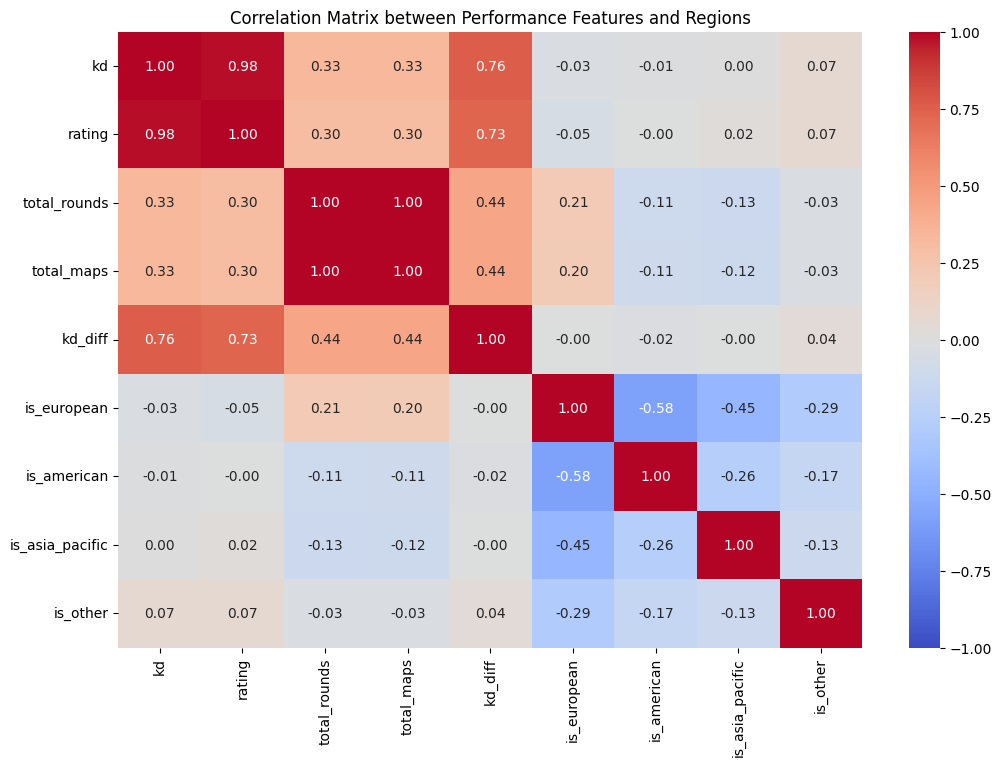

In [16]:
correlation_columns = ['kd', 'rating', 'total_rounds', 'total_maps', 'kd_diff',
                       'is_european', 'is_american', 'is_asia_pacific', 'is_other']


corr_matrix = df[correlation_columns].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)
plt.title("Correlation Matrix between Performance Features and Regions")
plt.show()


## Hypotheses

### Hypothesis 1: Players from European countries tend to have a higher K/D ratio compared to players from other regions (Americas, Asia-Pacific, and Other).
Rationale: Players from European countries may have different playstyles, training regimens, or competitive environments that impact their performance metrics like K/D ratio.

Null Hypothesis (H₀): The mean K/D ratio for players from European countries is equal to the mean K/D ratio for players from other regions (Americas, Asia-Pacific, and Other).
Alternative Hypothesis (H₁): The mean K/D ratio for players from European countries is different from the mean K/D ratio for players from other regions.

In [17]:
european_players_kd = df[df['is_european'] == 1]['kd']
non_european_players_kd = df[df['is_european'] == 0]['kd']


t_stat, p_value = stats.ttest_ind(european_players_kd, non_european_players_kd)


print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")


if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in K/D ratios between European and non-European players.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in K/D ratios between European and non-European players.")


T-statistic: -1.333
P-value: 0.183
Fail to reject the null hypothesis: There is no significant difference in K/D ratios between European and non-European players.


### Hypothesis 2: Players with more total rounds played will have a higher rating.
Rationale: The more rounds a player plays, the more likely they are to gain experience, improving their rating as they accumulate more matches and refine their skills.

Null Hypothesis (H₀): There is no significant correlation between the total rounds played and rating.                               
Alternative Hypothesis (H₁): There is a significant positive correlation between the total rounds played and rating.

In [18]:
correlation_total_rounds_rating = df[['total_rounds', 'rating']].corr().iloc[0, 1]

print(f"Correlation between total rounds and rating: {correlation_total_rounds_rating:.3f}")


t_stat, p_value = stats.pearsonr(df['total_rounds'], df['rating'])


print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")


if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant positive correlation between total rounds played and rating.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between total rounds played and rating.")

Correlation between total rounds and rating: 0.304
T-statistic: 0.304
P-value: 0.000
Reject the null hypothesis: There is a significant positive correlation between total rounds played and rating.


## Hypothesis 3: Team Affiliation Influences Player Performance
Null Hypothesis (H₀): Players associated with multiple teams do not perform better than those with single-team affiliations.             
Alternative Hypothesis (H₁): Players associated with multiple teams have higher Kill/Death ratios or ratings.

T-statistic: 1.315, p-value: 0.189


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_7028\1078175278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_teams'] = df['teams'].apply(lambda x: len(eval(x)))  # Converting string lists to actual lists


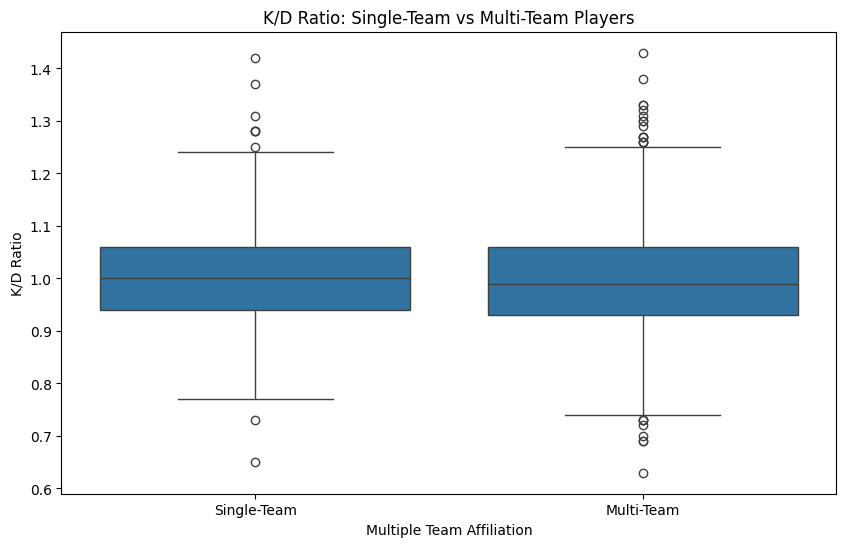

In [21]:
df['num_teams'] = df['teams'].apply(lambda x: len(eval(x)))  

single_team_kd = df[df['num_teams'] == 1]['kd']
multi_team_kd = df[df['num_teams'] > 1]['kd']

t_stat, p_value = ttest_ind(single_team_kd, multi_team_kd)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=(df['num_teams'] > 1), y='kd', data=df)
plt.title('K/D Ratio: Single-Team vs Multi-Team Players')
plt.xlabel('Multiple Team Affiliation')
plt.ylabel('K/D Ratio')
plt.xticks([0, 1], ['Single-Team', 'Multi-Team'])
plt.show()

## Findings and insights
Player Performance Trends:
"Players with a higher number of total rounds tend to have better ratings, as demonstrated by the significant positive correlation (r = 0.303)."
"Kill/Death ratios vary minimally across regions, with no significant difference between European and non-European players."
Regional Analysis:
"Europe has the largest number of professional players, followed by the Americas and Asia-Pacific."

## Next steps
Incorporate additional features, such as player roles (e.g., "entry fragger," "support") or tournament levels, to refine performance metrics.          
Investigate team dynamics, such as player tenure within teams, to assess their impact on performance.                                       
Explore infrastructure and training disparities among regions to understand performance differences beyond Kill/Death ratios.                       
Analyze tournament win rates and prize earnings by region.                                                             
Gather more detailed data, such as in-game actions (e.g., headshot percentage, utility usage), to enhance analysis depth.